In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Serpy import compute_directional_stats, compute_df, fit_ellipses, ellipse_params_to_maps, corrected_orientation, retrieval_Algorithm
import fabio

In [2]:
ref = fabio.open("/Users/samy/Downloads/Exp_Data/20250711_Samy/Carbon_fibers_r800mm/ref/Carbon_fibers_r800mm_0_00003_img.edf").data
sample = fabio.open("/Users/samy/Downloads/Exp_Data/20250711_Samy/Carbon_fibers_r800mm/sample/Carbon_fibers_r800mm_0_00002_img.edf").data

In [ ]:
angles = np.linspace(0, 2*np.pi, 15, endpoint=False)
results = retrieval_Algorithm(ref=ref[230:800, 270:],
                              img=sample[230:800, 270:],
                              angles=angles,
                              window_size=5,
                              band_thickness=1,
                              step=1,
                              smooth_sigma=9.0,
                              return_intermediates=True,
                              strict_finite=True,
                              verbose=True)

[dfr_pipeline_checked] HxW=(570, 242),
 angles=given,
 win=5, thick=1, step=1,
 sigma=6.0, strict_finite=True

Starting DF Retrieval pipeline...
Using 15 angles for directional statistics.


Computing directional stats: 100%|██████████| 15/15 [00:12<00:00,  1.25angle/s]


Computed directional statistics for sample image.


Computing directional stats: 100%|██████████| 15/15 [00:11<00:00,  1.25angle/s]


Computed directional statistics for reference image.
Computed directional, non-directional dark-field and transmission maps.
Fitted ellipses to directional dark-field profiles.
Corrected orientation map and computed saturation map.
Computed derived maps: eccentricity, intensity, area.


___

# Use all function separatly

In [3]:
angles = np.linspace(0, 2*np.pi, 15, endpoint=False)
mean_intensity_ref, std_intensity_ref = compute_directional_stats(ref, angles, 
                                                                  window_size=5,
                                                                  band_thickness=1,
                                                                  step=1)
mean_intensity_sample, std_intensity_sample = compute_directional_stats(sample, angles, 
                                                                        window_size=5,
                                                                        band_thickness=1,
                                                                        step=1)


Computing directional stats: 100%|██████████| 15/15 [00:46<00:00,  3.08s/angle]


In [4]:
Df_results, transmission_map = compute_df(std_ref=std_intensity_ref,
                                         std_sample=std_intensity_sample,
                                         mean_ref=mean_intensity_ref,
                                         mean_sample=mean_intensity_sample)

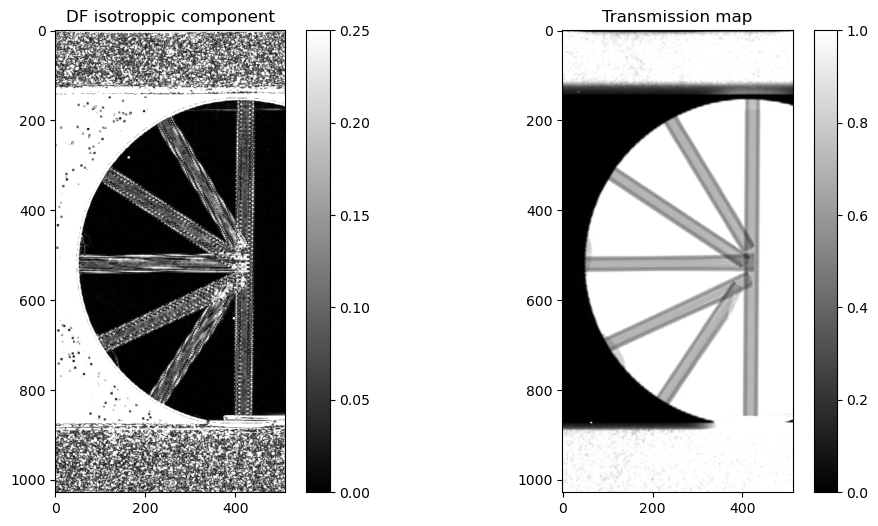

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("DF isotroppic component")
plt.imshow(Df_results[...,0], cmap='gray', vmin=0, vmax=0.25)
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title("Transmission map")
plt.imshow(transmission_map[...,0], cmap='gray', vmin=0, vmax=1)  
plt.colorbar()
plt.show()  

In [3]:
maj_ax_map, min_ax_map, orientation_map = fit_ellipses(Df_results=Df_results,
                                                       sin_angles=np.sin(angles),
                                                       cos_angles=np.cos(angles)
                                                        ) 
                                                       


NameError: name 'Df_results' is not defined

In [4]:
plt.figure(figsize=(12, 6))
plt.imshow(orientation_map, cmap='hsv', vmin=0, vmax=np.pi)
plt.colorbar(label='Orientation (radians)')
plt.title("Orientation map")
plt.show()

NameError: name 'orientation_map' is not defined

<Figure size 1200x600 with 0 Axes>

In [45]:
angles = np.linspace(0, 2*np.pi, 15, endpoint=False)
results = retrieval_Algorithm(ref=ref[230:800, 270:],
                              img=sample[230:800, 270:],
                              angles=angles,
                              window_size=5,
                              band_thickness=1,
                              step=1,
                              smooth_sigma=6.0,
                              return_intermediates=True,
                              strict_finite=True,
                              verbose=True)


[dfr_pipeline_checked] HxW=(570, 242),
 angles=given,
 win=5, thick=1, step=1,
 sigma=6.0, strict_finite=True

Starting DF Retrieval pipeline...
Using 15 angles for directional statistics.


Computing directional stats: 100%|██████████| 15/15 [00:12<00:00,  1.25angle/s]


Computed directional statistics for sample image.


Computing directional stats: 100%|██████████| 15/15 [00:12<00:00,  1.23angle/s]


Computed directional statistics for reference image.
Computed directional, non-directional dark-field and transmission maps.
Fitted ellipses to directional dark-field profiles.
Corrected orientation map and computed saturation map.
Computed derived maps: eccentricity, intensity, area.


In [46]:
for key, value in results.items():
    print(f"{key}: shape={value.shape}")

angles: shape=(15,)
Non-oriented Df: shape=(570, 242)
Oriented Df: shape=(570, 242, 15)
T: shape=(570, 242)
major axis: shape=(570, 242)
minor axis: shape=(570, 242)
Orientation: shape=(570, 242)
Corrected Orientation: shape=(570, 242)
saturation: shape=(570, 242)
eccentricity: shape=(570, 242)
intensity: shape=(570, 242)
area: shape=(570, 242)
mean_s: shape=(570, 242, 16)
std_s: shape=(570, 242, 16)
mean_r: shape=(570, 242, 16)
std_r: shape=(570, 242, 16)


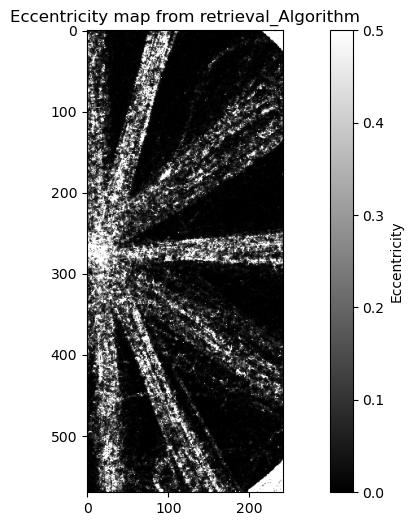

In [47]:
plt.figure(figsize=(12, 6))
plt.imshow(results['area'], cmap='gray', vmin=0, vmax=0.5)
plt.colorbar(label='Eccentricity')
plt.title("Eccentricity map from retrieval_Algorithm")
plt.show()

In [79]:
major = results['major axis']
minor = results['minor axis']

In [80]:
major = np.where(major<0.094, 0, major)
minor = np.where(minor<0.094, 0, minor)
e1 = major-minor
e2 = np.sqrt(1-(minor**2)/(major**2))
e3 = (minor/major)**2

/var/folders/0_/k993vz617nqfl4vy722j5c8c0000gn/T/ipykernel_44629/1031467471.py:4: RuntimeWarning: invalid value encountered in divide
  e2 = np.sqrt(1-(minor**2)/(major**2))
/var/folders/0_/k993vz617nqfl4vy722j5c8c0000gn/T/ipykernel_44629/1031467471.py:5: RuntimeWarning: invalid value encountered in divide
  e3 = (minor/major)**2


In [81]:
e2 = np.where(np.logical_or(np.isnan(e2), np.isinf(e2)), 0, e2)
e3 = np.where(np.logical_or(np.isnan(e3), np.isinf(e3)), 0, e3)

In [82]:
e1 = major-minor
e2 = np.sqrt(1-(minor**2)/(major**2))
e3 = (minor/major)**2

/var/folders/0_/k993vz617nqfl4vy722j5c8c0000gn/T/ipykernel_44629/2132389189.py:2: RuntimeWarning: invalid value encountered in divide
  e2 = np.sqrt(1-(minor**2)/(major**2))
/var/folders/0_/k993vz617nqfl4vy722j5c8c0000gn/T/ipykernel_44629/2132389189.py:3: RuntimeWarning: invalid value encountered in divide
  e3 = (minor/major)**2


In [69]:
fabio.tifimage.TifImage(data=major).write("e1.tif")
fabio.tifimage.TifImage(data=minor).write("e2.tif")


In [ ]:
major = np.where(np.logical_or(major))

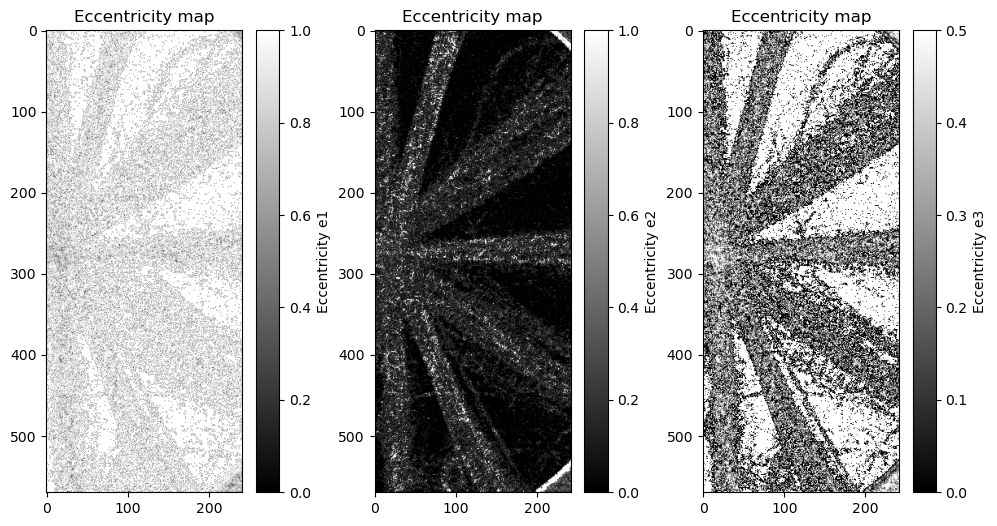

In [83]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Eccentricity map")
plt.imshow(e2, cmap='gray', vmin=0, vmax=1)
plt.colorbar(label='Eccentricity e1')
plt.subplot(1, 3, 2)
plt.title("Eccentricity map")
plt.imshow(e1, cmap='gray', vmin=0, vmax=1)
plt.colorbar(label='Eccentricity e2')
plt.subplot(1, 3, 3)
plt.title("Eccentricity map")
plt.imshow(e3, cmap='gray', vmin=0.0, vmax=0.5)
plt.colorbar(label='Eccentricity e3')
plt.show()